In [1]:
# import utility functions
import utils
from utils.flow_models import *
from utils.target import *
from utils.training import *

# import pytorch
import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
import torch.distributions as distrib
import torch.distributions.transforms as transform
# set number of threads
torch.set_num_threads(8)

# numerical libs
import scipy
import scipy.io

# import plotting
import matplotlib.pyplot as plt
%matplotlib inline

# import I/O
import os
import sys

# set seed
np.random.seed(8)
torch.manual_seed(0)

def loss_func_init(x, prior_logpdf, targ_logpdf):
        """ evaluate initial KL divergence between posterior distribution (NF + prior) 
        and target. x is samples without flow. This is a Monte-Carlo estimation of the 
        log partition function. """
        return (prior_logpdf - targ_logpdf(x)).mean()

In [2]:
%%javascript
// disable autoscrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Rank 2 + Tensorizing

In [3]:
# the wrapper is necessary, need to load mean and std data for each mixture Gaussian first
mixture_gauss_tf_dataset = utils.datasets.TensorizingFlowDataset("mixture_gaussian2d_truncated.mat", \
                                                              gaussian_data=False)
# input mean and std to wrapper
mu_input = np.array([mixture_gauss_tf_dataset.raw_dataset['mu1'][0], \
                     mixture_gauss_tf_dataset.raw_dataset['mu2'][0], \
                     mixture_gauss_tf_dataset.raw_dataset['mu3'][0], \
                     mixture_gauss_tf_dataset.raw_dataset['mu4'][0], \
                     mixture_gauss_tf_dataset.raw_dataset['mu5'][0], \
                    mixture_gauss_tf_dataset.raw_dataset['mu6'][0], \
                     mixture_gauss_tf_dataset.raw_dataset['mu7'][0], \
                     mixture_gauss_tf_dataset.raw_dataset['mu8'][0]])
std_input = np.array([mixture_gauss_tf_dataset.raw_dataset['covmat1'], \
                      mixture_gauss_tf_dataset.raw_dataset['covmat2'], \
                      mixture_gauss_tf_dataset.raw_dataset['covmat3'], \
                      mixture_gauss_tf_dataset.raw_dataset['covmat4'], \
                      mixture_gauss_tf_dataset.raw_dataset['covmat5'], \
                      mixture_gauss_tf_dataset.raw_dataset['covmat6'], \
                      mixture_gauss_tf_dataset.raw_dataset['covmat7'], \
                      mixture_gauss_tf_dataset.raw_dataset['covmat8']])

def mixture_gaussian_logpdf_wrapper(theta, mu_list=mu_input, sig_list=std_input):
    return mixture_gaussian_logpdf(theta, mu_list, sig_list, scaling=3)


    

In [ ]:
# begin training
# initialize NF model
mixture_flow = NormalizingFlow(dim=mixture_gauss_tf_dataset.dim, blocks=RESNET_BLOCKS2_MIXTURE_GAUSSIAN_8MODE, \
                            flow_length=2)


# begin training
mixture_report = train(mixture_gauss_tf_dataset, mixture_flow, mixture_gaussian_logpdf_wrapper, 
          num_epochs=200,
          batch_size=2**8,
          verbose=True,
          lr=1e-4,
          use_scheduler=True,
          grad_clip=1e+4)

## Normalizing Flow

::BacthNormFlow: Using exact stats: mix8, for initialization. 
::BacthNormFlow: Using exact stats: mix8, for initialization. 
[ Before Training ]:: ( KL-Divergence ) = 14.983700514586713


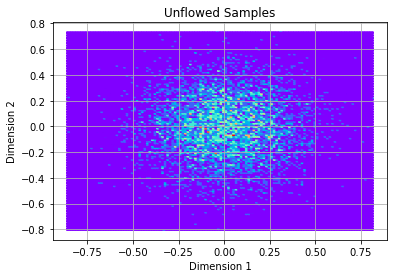

[ #### ]:: In training ...  ... (epoch1=>batch0)
[ #### ]:: In training ...  ... (epoch1=>batch10)
[ #### ]:: In training ...  ... (epoch1=>batch20)
[ #### ]:: In training ...  ... (epoch1=>batch30)


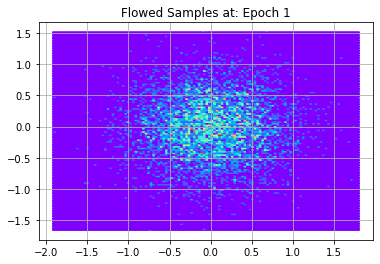

[ Epoch  1 ]:: ( Train Avg. Over Epoch ) = 8.42074126352651, ( Generalization ) = 8.340334219571366
[ ======== ]:: Report Learning Rate =  9.9610740086922e-05
[ ======== ]:: Report Norm of Gradient =  247.34675492789398
[ #### ]:: In training ...  ... (epoch2=>batch0)
[ #### ]:: In training ...  ... (epoch2=>batch10)
[ #### ]:: In training ...  ... (epoch2=>batch20)
[ #### ]:: In training ...  ... (epoch2=>batch30)
[ Epoch  2 ]:: ( Train Avg. Over Epoch ) = 8.37198349212283, ( Generalization ) = 8.260349323105434
[ ======== ]:: Report Learning Rate =  9.922299540664331e-05
[ ======== ]:: Report Norm of Gradient =  210.3700297061645
[ #### ]:: In training ...  ... (epoch3=>batch0)
[ #### ]:: In training ...  ... (epoch3=>batch10)
[ #### ]:: In training ...  ... (epoch3=>batch20)
[ #### ]:: In training ...  ... (epoch3=>batch30)
[ Epoch  3 ]:: ( Train Avg. Over Epoch ) = 8.291532211407516, ( Generalization ) = 8.180970958166837
[ ======== ]:: Report Learning Rate =  9.883676006097003e-05

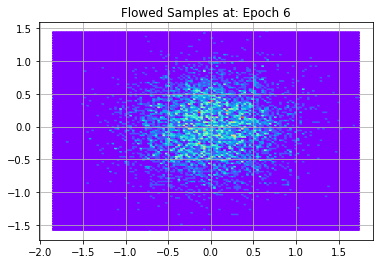

[ Epoch  6 ]:: ( Train Avg. Over Epoch ) = 7.966619955450553, ( Generalization ) = 7.873681580441953
[ ======== ]:: Report Learning Rate =  9.768705139349757e-05
[ ======== ]:: Report Norm of Gradient =  183.13421652610694
[ #### ]:: In training ...  ... (epoch7=>batch0)
[ #### ]:: In training ...  ... (epoch7=>batch10)
[ #### ]:: In training ...  ... (epoch7=>batch20)
[ #### ]:: In training ...  ... (epoch7=>batch30)
[ Epoch  7 ]:: ( Train Avg. Over Epoch ) = 7.835136419567175, ( Generalization ) = 7.7393355414399085
[ ======== ]:: Report Learning Rate =  9.730679486215478e-05
[ ======== ]:: Report Norm of Gradient =  140.06920951490747
[ #### ]:: In training ...  ... (epoch8=>batch0)
[ #### ]:: In training ...  ... (epoch8=>batch10)
[ #### ]:: In training ...  ... (epoch8=>batch20)
[ #### ]:: In training ...  ... (epoch8=>batch30)
[ Epoch  8 ]:: ( Train Avg. Over Epoch ) = 7.680798620776889, ( Generalization ) = 7.588144070403584
[ ======== ]:: Report Learning Rate =  9.6928018517055

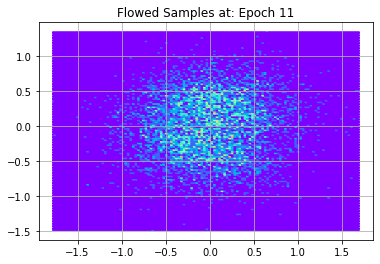

[ Epoch  11 ]:: ( Train Avg. Over Epoch ) = 7.185875698818897, ( Generalization ) = 7.0453493355278995
[ ======== ]:: Report Learning Rate =  9.580051309355453e-05
[ ======== ]:: Report Norm of Gradient =  68.9545857762961
[ #### ]:: In training ...  ... (epoch12=>batch0)
[ #### ]:: In training ...  ... (epoch12=>batch10)
[ #### ]:: In training ...  ... (epoch12=>batch20)
[ #### ]:: In training ...  ... (epoch12=>batch30)
[ Epoch  12 ]:: ( Train Avg. Over Epoch ) = 6.990512479975268, ( Generalization ) = 6.834009814906355
[ ======== ]:: Report Learning Rate =  9.542760009955823e-05
[ ======== ]:: Report Norm of Gradient =  69.65020105090174
[ #### ]:: In training ...  ... (epoch13=>batch0)
[ #### ]:: In training ...  ... (epoch13=>batch10)
[ #### ]:: In training ...  ... (epoch13=>batch20)
[ #### ]:: In training ...  ... (epoch13=>batch30)
[ Epoch  13 ]:: ( Train Avg. Over Epoch ) = 6.719453635002651, ( Generalization ) = 6.6056675239663605
[ ======== ]:: Report Learning Rate =  9.5056

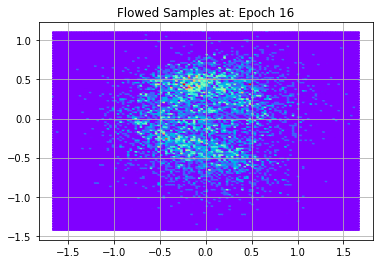

[ Epoch  16 ]:: ( Train Avg. Over Epoch ) = 5.957472688204336, ( Generalization ) = 5.818160523959363
[ ======== ]:: Report Learning Rate =  9.3950407736426e-05
[ ======== ]:: Report Norm of Gradient =  100.95023037987131
[ #### ]:: In training ...  ... (epoch17=>batch0)
[ #### ]:: In training ...  ... (epoch17=>batch10)
[ #### ]:: In training ...  ... (epoch17=>batch20)
[ #### ]:: In training ...  ... (epoch17=>batch30)
[ Epoch  17 ]:: ( Train Avg. Over Epoch ) = 5.6897882869752205, ( Generalization ) = 5.611065836242777
[ ======== ]:: Report Learning Rate =  9.358469646093473e-05
[ ======== ]:: Report Norm of Gradient =  77.66576462290479
[ #### ]:: In training ...  ... (epoch18=>batch0)
[ #### ]:: In training ...  ... (epoch18=>batch10)
[ #### ]:: In training ...  ... (epoch18=>batch20)
[ #### ]:: In training ...  ... (epoch18=>batch30)
[ Epoch  18 ]:: ( Train Avg. Over Epoch ) = 5.490554152909969, ( Generalization ) = 5.446144262072369
[ ======== ]:: Report Learning Rate =  9.32204

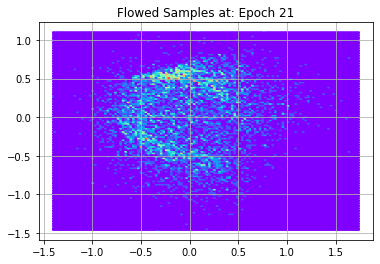

[ Epoch  21 ]:: ( Train Avg. Over Epoch ) = 5.054436941358427, ( Generalization ) = 4.971115312517167
[ ======== ]:: Report Learning Rate =  9.213603172689654e-05
[ ======== ]:: Report Norm of Gradient =  59.12838786477363
[ #### ]:: In training ...  ... (epoch22=>batch0)
[ #### ]:: In training ...  ... (epoch22=>batch10)
[ #### ]:: In training ...  ... (epoch22=>batch20)
[ #### ]:: In training ...  ... (epoch22=>batch30)
[ Epoch  22 ]:: ( Train Avg. Over Epoch ) = 4.909705507384712, ( Generalization ) = 4.826750596464236
[ ======== ]:: Report Learning Rate =  9.177738308988291e-05
[ ======== ]:: Report Norm of Gradient =  65.47395735903274
[ #### ]:: In training ...  ... (epoch23=>batch0)
[ #### ]:: In training ...  ... (epoch23=>batch10)
[ #### ]:: In training ...  ... (epoch23=>batch20)
[ #### ]:: In training ...  ... (epoch23=>batch30)
[ Epoch  23 ]:: ( Train Avg. Over Epoch ) = 4.7386634836282955, ( Generalization ) = 4.67132201057605
[ ======== ]:: Report Learning Rate =  9.14201

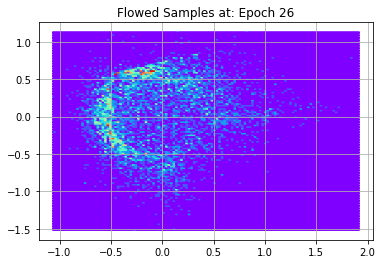

[ Epoch  26 ]:: ( Train Avg. Over Epoch ) = 4.376129837041335, ( Generalization ) = 4.368691126326977
[ ======== ]:: Report Learning Rate =  9.035669505762402e-05
[ ======== ]:: Report Norm of Gradient =  71.36467232803149
[ #### ]:: In training ...  ... (epoch27=>batch0)
[ #### ]:: In training ...  ... (epoch27=>batch10)
[ #### ]:: In training ...  ... (epoch27=>batch20)
[ #### ]:: In training ...  ... (epoch27=>batch30)
[ Epoch  27 ]:: ( Train Avg. Over Epoch ) = 1023.1841700953911, ( Generalization ) = 4.3355098337184295
[ ======== ]:: Report Learning Rate =  9.000497266498255e-05
[ ======== ]:: Report Norm of Gradient =  173.67790859577758
[ #### ]:: In training ...  ... (epoch28=>batch0)
[ #### ]:: In training ...  ... (epoch28=>batch10)
[ #### ]:: In training ...  ... (epoch28=>batch20)
[ #### ]:: In training ...  ... (epoch28=>batch30)
[ Epoch  28 ]:: ( Train Avg. Over Epoch ) = 4.307416648411567, ( Generalization ) = 4.296181834785035
[ ======== ]:: Report Learning Rate =  8.96

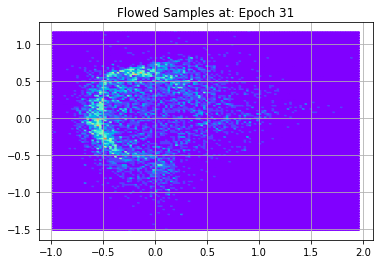

[ Epoch  31 ]:: ( Train Avg. Over Epoch ) = 4.16447200459389, ( Generalization ) = 4.192677637418619
[ ======== ]:: Report Learning Rate =  8.861172104673039e-05
[ ======== ]:: Report Norm of Gradient =  94.09211719476929
[ #### ]:: In training ...  ... (epoch32=>batch0)
[ #### ]:: In training ...  ... (epoch32=>batch10)
[ #### ]:: In training ...  ... (epoch32=>batch20)
[ #### ]:: In training ...  ... (epoch32=>batch30)
[ Epoch  32 ]:: ( Train Avg. Over Epoch ) = 4.179287806479857, ( Generalization ) = 4.150356805772162
[ ======== ]:: Report Learning Rate =  8.826679113840693e-05
[ ======== ]:: Report Norm of Gradient =  70.2205699661478
[ #### ]:: In training ...  ... (epoch33=>batch0)
[ #### ]:: In training ...  ... (epoch33=>batch10)
[ #### ]:: In training ...  ... (epoch33=>batch20)
[ #### ]:: In training ...  ... (epoch33=>batch30)
[ Epoch  33 ]:: ( Train Avg. Over Epoch ) = 4.132827900497089, ( Generalization ) = 4.104228795465098
[ ======== ]:: Report Learning Rate =  8.7923203

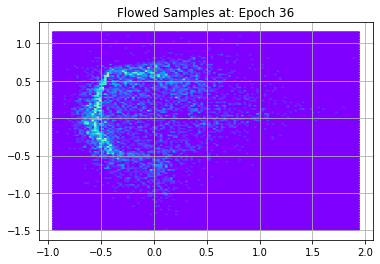

[ Epoch  36 ]:: ( Train Avg. Over Epoch ) = 4.010015489783753, ( Generalization ) = 4.016662898072374
[ ======== ]:: Report Learning Rate =  8.69004460804593e-05
[ ======== ]:: Report Norm of Gradient =  59.477217208924706
[ #### ]:: In training ...  ... (epoch37=>batch0)
[ #### ]:: In training ...  ... (epoch37=>batch10)
[ #### ]:: In training ...  ... (epoch37=>batch20)
[ #### ]:: In training ...  ... (epoch37=>batch30)
[ Epoch  37 ]:: ( Train Avg. Over Epoch ) = 3.94600169576581, ( Generalization ) = 4.00722587536531
[ ======== ]:: Report Learning Rate =  8.656217747958207e-05
[ ======== ]:: Report Norm of Gradient =  71.60587371521365
[ #### ]:: In training ...  ... (epoch38=>batch0)
[ #### ]:: In training ...  ... (epoch38=>batch10)
[ #### ]:: In training ...  ... (epoch38=>batch20)
[ #### ]:: In training ...  ... (epoch38=>batch30)
[ Epoch  38 ]:: ( Train Avg. Over Epoch ) = 3.966143649132177, ( Generalization ) = 3.969845845335378
[ ======== ]:: Report Learning Rate =  8.6225225

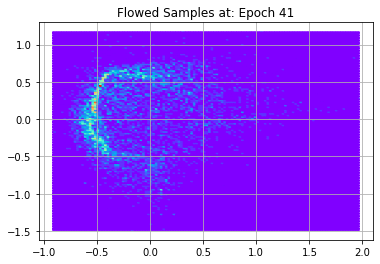

[ Epoch  41 ]:: ( Train Avg. Over Epoch ) = 3.88438609589329, ( Generalization ) = 3.894736860042653
[ ======== ]:: Report Learning Rate =  8.522221936080383e-05
[ ======== ]:: Report Norm of Gradient =  103.58669102077651
[ #### ]:: In training ...  ... (epoch42=>batch0)
[ #### ]:: In training ...  ... (epoch42=>batch10)
[ #### ]:: In training ...  ... (epoch42=>batch20)
[ #### ]:: In training ...  ... (epoch42=>batch30)
[ Epoch  42 ]:: ( Train Avg. Over Epoch ) = 3.8209077984826094, ( Generalization ) = 3.871750570578479
[ ======== ]:: Report Learning Rate =  8.489048342379685e-05
[ ======== ]:: Report Norm of Gradient =  73.65446601694877
[ #### ]:: In training ...  ... (epoch43=>batch0)
[ #### ]:: In training ...  ... (epoch43=>batch10)
[ #### ]:: In training ...  ... (epoch43=>batch20)
[ #### ]:: In training ...  ... (epoch43=>batch30)
[ Epoch  43 ]:: ( Train Avg. Over Epoch ) = 3.8204862103640505, ( Generalization ) = 3.8480073980766796
[ ======== ]:: Report Learning Rate =  8.45

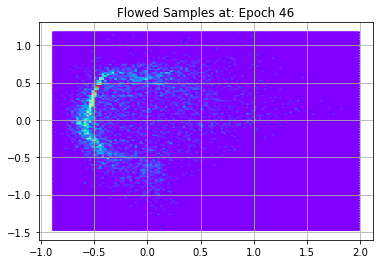

[ Epoch  46 ]:: ( Train Avg. Over Epoch ) = 3.721133835128243, ( Generalization ) = 3.787619654689963
[ ======== ]:: Report Learning Rate =  8.35764026580079e-05
[ ======== ]:: Report Norm of Gradient =  107.26774522745276
[ #### ]:: In training ...  ... (epoch47=>batch0)
[ #### ]:: In training ...  ... (epoch47=>batch10)
[ #### ]:: In training ...  ... (epoch47=>batch20)
[ #### ]:: In training ...  ... (epoch47=>batch30)
[ Epoch  47 ]:: ( Train Avg. Over Epoch ) = 3.7064994421328494, ( Generalization ) = 3.763119897867866
[ ======== ]:: Report Learning Rate =  8.325107322566766e-05
[ ======== ]:: Report Norm of Gradient =  117.55974400001709
[ #### ]:: In training ...  ... (epoch48=>batch0)
[ #### ]:: In training ...  ... (epoch48=>batch10)
[ #### ]:: In training ...  ... (epoch48=>batch20)
[ #### ]:: In training ...  ... (epoch48=>batch30)
[ Epoch  48 ]:: ( Train Avg. Over Epoch ) = 3.7015043649685992, ( Generalization ) = 3.7335362887244607
[ ======== ]:: Report Learning Rate =  8.2

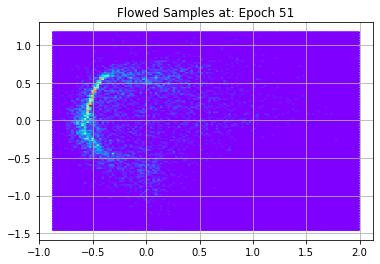

[ Epoch  51 ]:: ( Train Avg. Over Epoch ) = 3.6367837210735696, ( Generalization ) = 3.665287383038968
[ ======== ]:: Report Learning Rate =  8.196237006784743e-05
[ ======== ]:: Report Norm of Gradient =  126.68002533256433
[ #### ]:: In training ...  ... (epoch52=>batch0)
[ #### ]:: In training ...  ... (epoch52=>batch10)
[ #### ]:: In training ...  ... (epoch52=>batch20)
[ #### ]:: In training ...  ... (epoch52=>batch30)
[ Epoch  52 ]:: ( Train Avg. Over Epoch ) = 3.626789338288437, ( Generalization ) = 3.6301932662794383
[ ======== ]:: Report Learning Rate =  8.16433234173647e-05
[ ======== ]:: Report Norm of Gradient =  127.57188135478842
[ #### ]:: In training ...  ... (epoch53=>batch0)
[ #### ]:: In training ...  ... (epoch53=>batch10)
[ #### ]:: In training ...  ... (epoch53=>batch20)
[ #### ]:: In training ...  ... (epoch53=>batch30)
[ Epoch  53 ]:: ( Train Avg. Over Epoch ) = 3.587981965316176, ( Generalization ) = 3.624555761472588
[ ======== ]:: Report Learning Rate =  8.13

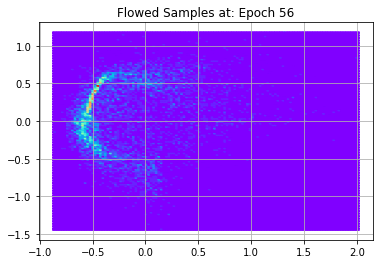

[ Epoch  56 ]:: ( Train Avg. Over Epoch ) = 3.5275361095796964, ( Generalization ) = 3.5520326757434058
[ ======== ]:: Report Learning Rate =  8.037950777359879e-05
[ ======== ]:: Report Norm of Gradient =  235.9697715895439
[ #### ]:: In training ...  ... (epoch57=>batch0)
[ #### ]:: In training ...  ... (epoch57=>batch10)
[ #### ]:: In training ...  ... (epoch57=>batch20)
[ #### ]:: In training ...  ... (epoch57=>batch30)
[ Epoch  57 ]:: ( Train Avg. Over Epoch ) = 3.474952999459788, ( Generalization ) = 3.5102503792299564
[ ======== ]:: Report Learning Rate =  8.006662257150675e-05
[ ======== ]:: Report Norm of Gradient =  119.36363214309944
[ #### ]:: In training ...  ... (epoch58=>batch0)
[ #### ]:: In training ...  ... (epoch58=>batch10)
[ #### ]:: In training ...  ... (epoch58=>batch20)
[ #### ]:: In training ...  ... (epoch58=>batch30)
[ Epoch  58 ]:: ( Train Avg. Over Epoch ) = 3.4281182316790977, ( Generalization ) = 3.506225856100062
[ ======== ]:: Report Learning Rate =  7.

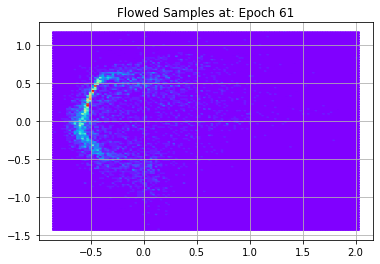

[ Epoch  61 ]:: ( Train Avg. Over Epoch ) = 3.4054962483575695, ( Generalization ) = 3.4305475336867417
[ ======== ]:: Report Learning Rate =  7.882721381260447e-05
[ ======== ]:: Report Norm of Gradient =  117.92141367536378
[ #### ]:: In training ...  ... (epoch62=>batch0)
[ #### ]:: In training ...  ... (epoch62=>batch10)
[ #### ]:: In training ...  ... (epoch62=>batch20)
[ #### ]:: In training ...  ... (epoch62=>batch30)
[ Epoch  62 ]:: ( Train Avg. Over Epoch ) = 3.3536419652329394, ( Generalization ) = 3.410749019463238
[ ======== ]:: Report Learning Rate =  7.852037106863568e-05
[ ======== ]:: Report Norm of Gradient =  292.0516917365831
[ #### ]:: In training ...  ... (epoch63=>batch0)
[ #### ]:: In training ...  ... (epoch63=>batch10)
[ #### ]:: In training ...  ... (epoch63=>batch20)
[ #### ]:: In training ...  ... (epoch63=>batch30)
[ Epoch  63 ]:: ( Train Avg. Over Epoch ) = 3.3536931939956083, ( Generalization ) = 3.3926403479639546
[ ======== ]:: Report Learning Rate =  7

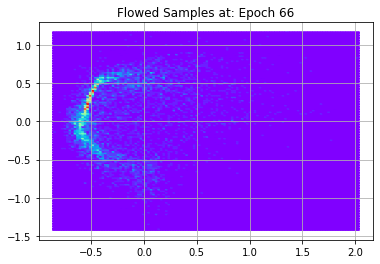

[ Epoch  66 ]:: ( Train Avg. Over Epoch ) = 3.2893317223117995, ( Generalization ) = 3.3099670464903177
[ ======== ]:: Report Learning Rate =  7.730489784734656e-05
[ ======== ]:: Report Norm of Gradient =  55.6549999906773
[ #### ]:: In training ...  ... (epoch67=>batch0)
[ #### ]:: In training ...  ... (epoch67=>batch10)
[ #### ]:: In training ...  ... (epoch67=>batch20)
[ #### ]:: In training ...  ... (epoch67=>batch30)
[ Epoch  67 ]:: ( Train Avg. Over Epoch ) = 3.2798481827514663, ( Generalization ) = 3.292807190710865
[ ======== ]:: Report Learning Rate =  7.700398086918093e-05
[ ======== ]:: Report Norm of Gradient =  98.5251194999066
[ #### ]:: In training ...  ... (epoch68=>batch0)
[ #### ]:: In training ...  ... (epoch68=>batch10)
[ #### ]:: In training ...  ... (epoch68=>batch20)
[ #### ]:: In training ...  ... (epoch68=>batch30)
[ Epoch  68 ]:: ( Train Avg. Over Epoch ) = 3.2531160141807245, ( Generalization ) = 3.281573059826157
[ ======== ]:: Report Learning Rate =  7.670

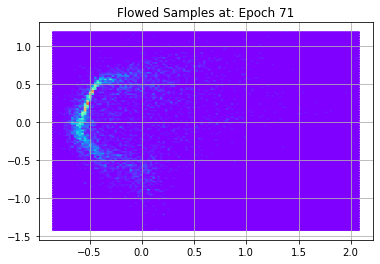

[ Epoch  71 ]:: ( Train Avg. Over Epoch ) = 3.169883637548011, ( Generalization ) = 3.2233752104598605
[ ======== ]:: Report Learning Rate =  7.58119809409416e-05
[ ======== ]:: Report Norm of Gradient =  132.17645257562913
[ #### ]:: In training ...  ... (epoch72=>batch0)
[ #### ]:: In training ...  ... (epoch72=>batch10)
[ #### ]:: In training ...  ... (epoch72=>batch20)
[ #### ]:: In training ...  ... (epoch72=>batch30)
[ Epoch  72 ]:: ( Train Avg. Over Epoch ) = 3.145364875788431, ( Generalization ) = 3.1956942967756867
[ ======== ]:: Report Learning Rate =  7.551687528982819e-05
[ ======== ]:: Report Norm of Gradient =  209.6914824050666
[ #### ]:: In training ...  ... (epoch73=>batch0)
[ #### ]:: In training ...  ... (epoch73=>batch10)
[ #### ]:: In training ...  ... (epoch73=>batch20)
[ #### ]:: In training ...  ... (epoch73=>batch30)
[ Epoch  73 ]:: ( Train Avg. Over Epoch ) = 3.1413942955422836, ( Generalization ) = 3.1697451983954417
[ ======== ]:: Report Learning Rate =  7.5

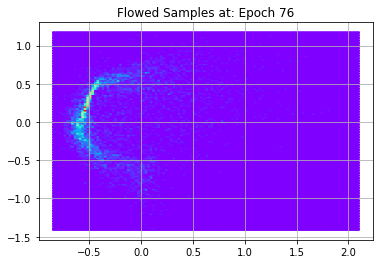

[ Epoch  76 ]:: ( Train Avg. Over Epoch ) = 3.0583337098440997, ( Generalization ) = 3.115822795325226
[ ======== ]:: Report Learning Rate =  7.434789533697012e-05
[ ======== ]:: Report Norm of Gradient =  112.80547041396429
[ #### ]:: In training ...  ... (epoch77=>batch0)
[ #### ]:: In training ...  ... (epoch77=>batch10)
[ #### ]:: In training ...  ... (epoch77=>batch20)
[ #### ]:: In training ...  ... (epoch77=>batch30)
[ Epoch  77 ]:: ( Train Avg. Over Epoch ) = 3.039867626741914, ( Generalization ) = 3.086145546241379
[ ======== ]:: Report Learning Rate =  7.405848878420612e-05
[ ======== ]:: Report Norm of Gradient =  197.00591382863433
[ #### ]:: In training ...  ... (epoch78=>batch0)
[ #### ]:: In training ...  ... (epoch78=>batch10)
[ #### ]:: In training ...  ... (epoch78=>batch20)
[ #### ]:: In training ...  ... (epoch78=>batch30)
[ Epoch  78 ]:: ( Train Avg. Over Epoch ) = 3.017121505195672, ( Generalization ) = 3.0625009611164122
[ ======== ]:: Report Learning Rate =  7.3

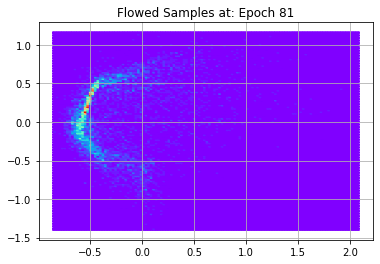

[ Epoch  81 ]:: ( Train Avg. Over Epoch ) = 2.963526080756989, ( Generalization ) = 2.9999651116849613
[ ======== ]:: Report Learning Rate =  7.291208424355954e-05
[ ======== ]:: Report Norm of Gradient =  136.47741552521035
[ #### ]:: In training ...  ... (epoch82=>batch0)
[ #### ]:: In training ...  ... (epoch82=>batch10)
[ #### ]:: In training ...  ... (epoch82=>batch20)
[ #### ]:: In training ...  ... (epoch82=>batch30)
[ Epoch  82 ]:: ( Train Avg. Over Epoch ) = 2.9374788923526753, ( Generalization ) = 2.9758994549029336
[ ======== ]:: Report Learning Rate =  7.26282667278097e-05
[ ======== ]:: Report Norm of Gradient =  106.14049248577643
[ #### ]:: In training ...  ... (epoch83=>batch0)
[ #### ]:: In training ...  ... (epoch83=>batch10)
[ #### ]:: In training ...  ... (epoch83=>batch20)
[ #### ]:: In training ...  ... (epoch83=>batch30)
[ Epoch  83 ]:: ( Train Avg. Over Epoch ) = 2.90547790226206, ( Generalization ) = 2.970707090699124
[ ======== ]:: Report Learning Rate =  7.23

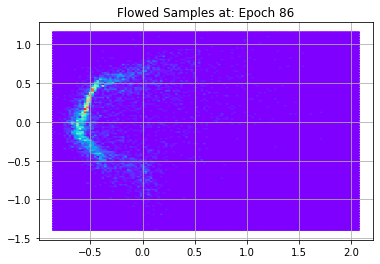

[ Epoch  86 ]:: ( Train Avg. Over Epoch ) = 2.8689842182306586, ( Generalization ) = 2.8943154613324
[ ======== ]:: Report Learning Rate =  7.150400162163582e-05
[ ======== ]:: Report Norm of Gradient =  94.72620905302823
[ #### ]:: In training ...  ... (epoch87=>batch0)
[ #### ]:: In training ...  ... (epoch87=>batch10)
[ #### ]:: In training ...  ... (epoch87=>batch20)
[ #### ]:: In training ...  ... (epoch87=>batch30)
[ Epoch  87 ]:: ( Train Avg. Over Epoch ) = 2.8383958529354234, ( Generalization ) = 2.8876662741895487
[ ======== ]:: Report Learning Rate =  7.122566520707609e-05
[ ======== ]:: Report Norm of Gradient =  81.60011751493772
[ #### ]:: In training ...  ... (epoch88=>batch0)
[ #### ]:: In training ...  ... (epoch88=>batch10)
[ #### ]:: In training ...  ... (epoch88=>batch20)
[ #### ]:: In training ...  ... (epoch88=>batch30)
[ Epoch  88 ]:: ( Train Avg. Over Epoch ) = 2.834375415962826, ( Generalization ) = 2.862350499493023
[ ======== ]:: Report Learning Rate =  7.0948

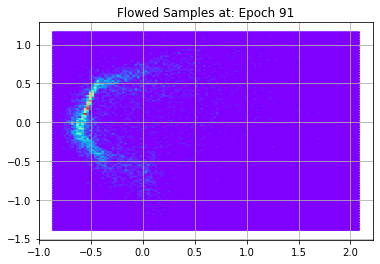

[ Epoch  91 ]:: ( Train Avg. Over Epoch ) = 2.7862348955853045, ( Generalization ) = 2.803035747993408
[ ======== ]:: Report Learning Rate =  7.012311197726494e-05
[ ======== ]:: Report Norm of Gradient =  622.1446664495586
[ #### ]:: In training ...  ... (epoch92=>batch0)
[ #### ]:: In training ...  ... (epoch92=>batch10)
[ #### ]:: In training ...  ... (epoch92=>batch20)
[ #### ]:: In training ...  ... (epoch92=>batch30)
[ Epoch  92 ]:: ( Train Avg. Over Epoch ) = 2.7341273971440003, ( Generalization ) = 2.7657092259449656
[ ======== ]:: Report Learning Rate =  6.985015081253462e-05
[ ======== ]:: Report Norm of Gradient =  218.51221778634064
[ #### ]:: In training ...  ... (epoch93=>batch0)
[ #### ]:: In training ...  ... (epoch93=>batch10)
[ #### ]:: In training ...  ... (epoch93=>batch20)
[ #### ]:: In training ...  ... (epoch93=>batch30)
[ Epoch  93 ]:: ( Train Avg. Over Epoch ) = 2.7525188697191547, ( Generalization ) = 2.76599079914243
[ ======== ]:: Report Learning Rate =  6.9

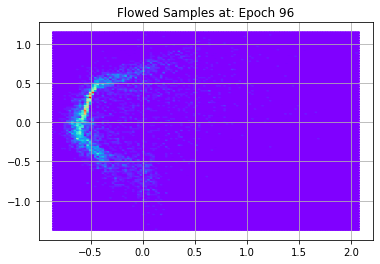

[ Epoch  96 ]:: ( Train Avg. Over Epoch ) = 2.6840622402937813, ( Generalization ) = 2.7032941541117803
[ ======== ]:: Report Learning Rate =  6.876889015800426e-05
[ ======== ]:: Report Norm of Gradient =  47.095511204903765
[ #### ]:: In training ...  ... (epoch97=>batch0)
[ #### ]:: In training ...  ... (epoch97=>batch10)
[ #### ]:: In training ...  ... (epoch97=>batch20)
[ #### ]:: In training ...  ... (epoch97=>batch30)
[ Epoch  97 ]:: ( Train Avg. Over Epoch ) = 2.6786887582791192, ( Generalization ) = 2.6828711694639957
[ ======== ]:: Report Learning Rate =  6.85012004359505e-05
[ ======== ]:: Report Norm of Gradient =  78.5113116316508
[ #### ]:: In training ...  ... (epoch98=>batch0)
[ #### ]:: In training ...  ... (epoch98=>batch10)
[ #### ]:: In training ...  ... (epoch98=>batch20)
[ #### ]:: In training ...  ... (epoch98=>batch30)
[ Epoch  98 ]:: ( Train Avg. Over Epoch ) = 2.652092296073968, ( Generalization ) = 2.668466590064679
[ ======== ]:: Report Learning Rate =  6.82

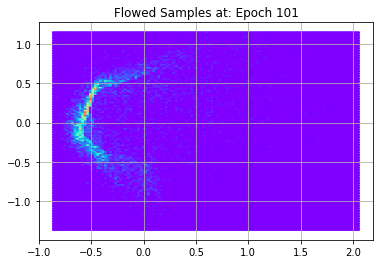

[ Epoch  101 ]:: ( Train Avg. Over Epoch ) = 2.60725097300408, ( Generalization ) = 2.606283774971633
[ ======== ]:: Report Learning Rate =  6.744082115318731e-05
[ ======== ]:: Report Norm of Gradient =  118.67705113288784
[ #### ]:: In training ...  ... (epoch102=>batch0)
[ #### ]:: In training ...  ... (epoch102=>batch10)
[ #### ]:: In training ...  ... (epoch102=>batch20)
[ #### ]:: In training ...  ... (epoch102=>batch30)
[ Epoch  102 ]:: ( Train Avg. Over Epoch ) = 2.6041860524746707, ( Generalization ) = 2.5889437645275235
[ ======== ]:: Report Learning Rate =  6.717830107138733e-05
[ ======== ]:: Report Norm of Gradient =  121.61105215110028
[ #### ]:: In training ...  ... (epoch103=>batch0)
[ #### ]:: In training ...  ... (epoch103=>batch10)
[ #### ]:: In training ...  ... (epoch103=>batch20)
[ #### ]:: In training ...  ... (epoch103=>batch30)
[ Epoch  103 ]:: ( Train Avg. Over Epoch ) = 2.5572497505508873, ( Generalization ) = 2.5764288868079346
[ ======== ]:: Report Learning

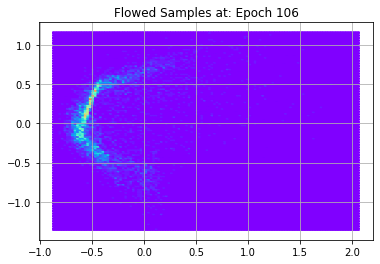

[ Epoch  106 ]:: ( Train Avg. Over Epoch ) = 2.561272650605149, ( Generalization ) = 2.5240180393430283
[ ======== ]:: Report Learning Rate =  6.613839989806519e-05
[ ======== ]:: Report Norm of Gradient =  77.31197371183583
[ #### ]:: In training ...  ... (epoch107=>batch0)
[ #### ]:: In training ...  ... (epoch107=>batch10)
[ #### ]:: In training ...  ... (epoch107=>batch20)
[ #### ]:: In training ...  ... (epoch107=>batch30)
[ Epoch  107 ]:: ( Train Avg. Over Epoch ) = 2.528960889905214, ( Generalization ) = 2.5028159113603152
[ ======== ]:: Report Learning Rate =  6.58809496201108e-05
[ ======== ]:: Report Norm of Gradient =  64.41818093217758
[ #### ]:: In training ...  ... (epoch108=>batch0)
[ #### ]:: In training ...  ... (epoch108=>batch10)
[ #### ]:: In training ...  ... (epoch108=>batch20)
[ #### ]:: In training ...  ... (epoch108=>batch30)
[ Epoch  108 ]:: ( Train Avg. Over Epoch ) = 2.5197278733885327, ( Generalization ) = 2.486191023769359
[ ======== ]:: Report Learning Ra

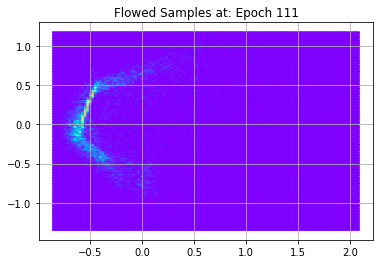

[ Epoch  111 ]:: ( Train Avg. Over Epoch ) = 2.4713017955514407, ( Generalization ) = 2.442044957126785
[ ======== ]:: Report Learning Rate =  6.486113108172996e-05
[ ======== ]:: Report Norm of Gradient =  177.27570361297086
[ #### ]:: In training ...  ... (epoch112=>batch0)
[ #### ]:: In training ...  ... (epoch112=>batch10)
[ #### ]:: In training ...  ... (epoch112=>batch20)
[ #### ]:: In training ...  ... (epoch112=>batch30)
[ Epoch  112 ]:: ( Train Avg. Over Epoch ) = 2.494249981044364, ( Generalization ) = 153.40740346594674
[ ======== ]:: Report Learning Rate =  6.460865269925978e-05
[ ======== ]:: Report Norm of Gradient =  67.06397958229208
[ #### ]:: In training ...  ... (epoch113=>batch0)
[ #### ]:: In training ...  ... (epoch113=>batch10)
[ #### ]:: In training ...  ... (epoch113=>batch20)
[ #### ]:: In training ...  ... (epoch113=>batch30)
[ Epoch  113 ]:: ( Train Avg. Over Epoch ) = 2.4755917917041947, ( Generalization ) = 189.54573606434099
[ ======== ]:: Report Learning

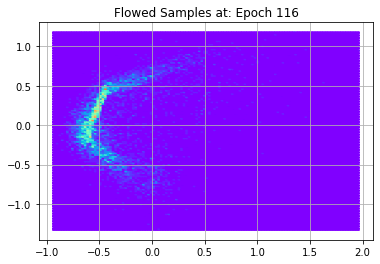

[ Epoch  116 ]:: ( Train Avg. Over Epoch ) = 2.4292706908155055, ( Generalization ) = 2.3517991332562906
[ ======== ]:: Report Learning Rate =  6.360852895874828e-05
[ ======== ]:: Report Norm of Gradient =  97.62913931950813
[ #### ]:: In training ...  ... (epoch117=>batch0)
[ #### ]:: In training ...  ... (epoch117=>batch10)
[ #### ]:: In training ...  ... (epoch117=>batch20)
[ #### ]:: In training ...  ... (epoch117=>batch30)
[ Epoch  117 ]:: ( Train Avg. Over Epoch ) = 2.3521280851020965, ( Generalization ) = 2.3324206211721314
[ ======== ]:: Report Learning Rate =  6.336092645421322e-05
[ ======== ]:: Report Norm of Gradient =  195.8379226106708
[ #### ]:: In training ...  ... (epoch118=>batch0)
[ #### ]:: In training ...  ... (epoch118=>batch10)
[ #### ]:: In training ...  ... (epoch118=>batch20)
[ #### ]:: In training ...  ... (epoch118=>batch30)
[ Epoch  118 ]:: ( Train Avg. Over Epoch ) = 2.3516854197996255, ( Generalization ) = 2.3177691658311055
[ ======== ]:: Report Learnin

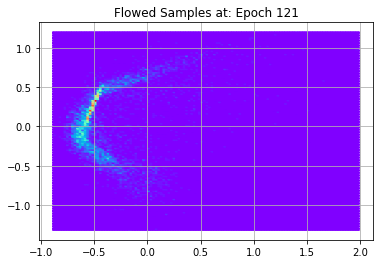

[ Epoch  121 ]:: ( Train Avg. Over Epoch ) = 2.3216494135052925, ( Generalization ) = 2.2727955946556255
[ ======== ]:: Report Learning Rate =  6.238011716443241e-05
[ ======== ]:: Report Norm of Gradient =  198.08610042733716
[ #### ]:: In training ...  ... (epoch122=>batch0)
[ #### ]:: In training ...  ... (epoch122=>batch10)
[ #### ]:: In training ...  ... (epoch122=>batch20)
[ #### ]:: In training ...  ... (epoch122=>batch30)
[ Epoch  122 ]:: ( Train Avg. Over Epoch ) = 2.313781016203408, ( Generalization ) = 2.2717761654695967
[ ======== ]:: Report Learning Rate =  6.21372963745802e-05
[ ======== ]:: Report Norm of Gradient =  60.55829672252264
[ #### ]:: In training ...  ... (epoch123=>batch0)
[ #### ]:: In training ...  ... (epoch123=>batch10)
[ #### ]:: In training ...  ... (epoch123=>batch20)
[ #### ]:: In training ...  ... (epoch123=>batch30)
[ Epoch  123 ]:: ( Train Avg. Over Epoch ) = 2.331397849324504, ( Generalization ) = 2.2596612574705057
[ ======== ]:: Report Learning 

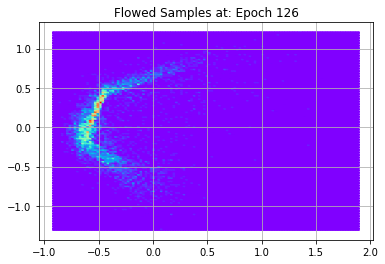

[ Epoch  126 ]:: ( Train Avg. Over Epoch ) = 2.2668060502340572, ( Generalization ) = 2.2127127292107405
[ ======== ]:: Report Learning Rate =  6.117542853367835e-05
[ ======== ]:: Report Norm of Gradient =  85.36261402867673
[ #### ]:: In training ...  ... (epoch127=>batch0)
[ #### ]:: In training ...  ... (epoch127=>batch10)
[ #### ]:: In training ...  ... (epoch127=>batch20)
[ #### ]:: In training ...  ... (epoch127=>batch30)
[ Epoch  127 ]:: ( Train Avg. Over Epoch ) = 2.249484181521492, ( Generalization ) = 2.1928028736484575
[ ======== ]:: Report Learning Rate =  6.093729711374305e-05
[ ======== ]:: Report Norm of Gradient =  243.08365304716813
[ #### ]:: In training ...  ... (epoch128=>batch0)
[ #### ]:: In training ...  ... (epoch128=>batch10)
[ #### ]:: In training ...  ... (epoch128=>batch20)
[ #### ]:: In training ...  ... (epoch128=>batch30)
[ Epoch  128 ]:: ( Train Avg. Over Epoch ) = 2.2335755237989443, ( Generalization ) = 2.1887727683902223
[ ======== ]:: Report Learnin

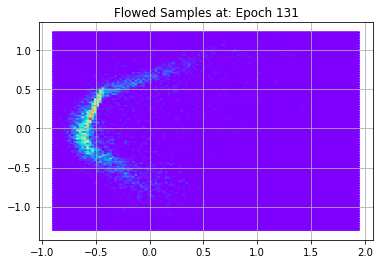

[ Epoch  131 ]:: ( Train Avg. Over Epoch ) = 2.237713945048526, ( Generalization ) = 2.1540245583015576
[ ======== ]:: Report Learning Rate =  5.999400492330313e-05
[ ======== ]:: Report Norm of Gradient =  111.12554253952105
[ #### ]:: In training ...  ... (epoch132=>batch0)
[ #### ]:: In training ...  ... (epoch132=>batch10)
[ #### ]:: In training ...  ... (epoch132=>batch20)
[ #### ]:: In training ...  ... (epoch132=>batch30)
[ Epoch  132 ]:: ( Train Avg. Over Epoch ) = 2.1997844260985984, ( Generalization ) = 2.1362358013353937
[ ======== ]:: Report Learning Rate =  5.976047231188664e-05
[ ======== ]:: Report Norm of Gradient =  131.67613804815767
[ #### ]:: In training ...  ... (epoch133=>batch0)
[ #### ]:: In training ...  ... (epoch133=>batch10)
[ #### ]:: In training ...  ... (epoch133=>batch20)
[ #### ]:: In training ...  ... (epoch133=>batch30)
[ Epoch  133 ]:: ( Train Avg. Over Epoch ) = 2.1788097867780354, ( Generalization ) = 2.1279976425536593
[ ======== ]:: Report Learni

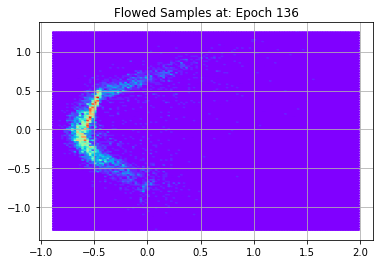

[ Epoch  136 ]:: ( Train Avg. Over Epoch ) = 2.1415745696057593, ( Generalization ) = 2.078929094864588
[ ======== ]:: Report Learning Rate =  5.883539703781301e-05
[ ======== ]:: Report Norm of Gradient =  180.35150972675476
[ #### ]:: In training ...  ... (epoch137=>batch0)
[ #### ]:: In training ...  ... (epoch137=>batch10)
[ #### ]:: In training ...  ... (epoch137=>batch20)
[ #### ]:: In training ...  ... (epoch137=>batch30)
[ Epoch  137 ]:: ( Train Avg. Over Epoch ) = 2.150118655399079, ( Generalization ) = 2.082586569412724
[ ======== ]:: Report Learning Rate =  5.8606374422444513e-05
[ ======== ]:: Report Norm of Gradient =  138.04359058233334
[ #### ]:: In training ...  ... (epoch138=>batch0)
[ #### ]:: In training ...  ... (epoch138=>batch10)
[ #### ]:: In training ...  ... (epoch138=>batch20)
[ #### ]:: In training ...  ... (epoch138=>batch30)
[ Epoch  138 ]:: ( Train Avg. Over Epoch ) = 2.110786814267906, ( Generalization ) = 2.0658520827676172
[ ======== ]:: Report Learning

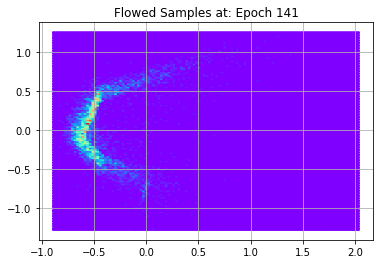

[ Epoch  141 ]:: ( Train Avg. Over Epoch ) = 2.086085534137162, ( Generalization ) = 2.030813147436092
[ ======== ]:: Report Learning Rate =  5.769916425853616e-05
[ ======== ]:: Report Norm of Gradient =  110.85994637237273
[ #### ]:: In training ...  ... (epoch142=>batch0)
[ #### ]:: In training ...  ... (epoch142=>batch10)
[ #### ]:: In training ...  ... (epoch142=>batch20)
[ #### ]:: In training ...  ... (epoch142=>batch30)
[ Epoch  142 ]:: ( Train Avg. Over Epoch ) = 2.031352332564193, ( Generalization ) = 2.0160398005785236
[ ======== ]:: Report Learning Rate =  5.747456454189663e-05
[ ======== ]:: Report Norm of Gradient =  281.0272248004768
[ #### ]:: In training ...  ... (epoch143=>batch0)
[ #### ]:: In training ...  ... (epoch143=>batch10)
[ #### ]:: In training ...  ... (epoch143=>batch20)
[ #### ]:: In training ...  ... (epoch143=>batch30)
[ Epoch  143 ]:: ( Train Avg. Over Epoch ) = 2.0379571543328114, ( Generalization ) = 2.013509959792236
[ ======== ]:: Report Learning R

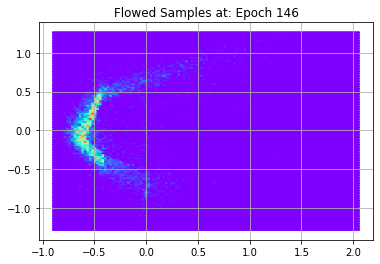

[ Epoch  146 ]:: ( Train Avg. Over Epoch ) = 1.9614581370110198, ( Generalization ) = 1.9560919302494724
[ ======== ]:: Report Learning Rate =  5.658487447605558e-05
[ ======== ]:: Report Norm of Gradient =  63.60550318246539
[ #### ]:: In training ...  ... (epoch147=>batch0)
[ #### ]:: In training ...  ... (epoch147=>batch10)
[ #### ]:: In training ...  ... (epoch147=>batch20)
[ #### ]:: In training ...  ... (epoch147=>batch30)
[ Epoch  147 ]:: ( Train Avg. Over Epoch ) = 2.0033289590625323, ( Generalization ) = 1.9518346652315968
[ ======== ]:: Report Learning Rate =  5.636461224285479e-05
[ ======== ]:: Report Norm of Gradient =  156.83147243833093
[ #### ]:: In training ...  ... (epoch148=>batch0)
[ #### ]:: In training ...  ... (epoch148=>batch10)
[ #### ]:: In training ...  ... (epoch148=>batch20)
[ #### ]:: In training ...  ... (epoch148=>batch30)
[ Epoch  148 ]:: ( Train Avg. Over Epoch ) = 1.9745934742494573, ( Generalization ) = 1.9153040609680911
[ ======== ]:: Report Learni

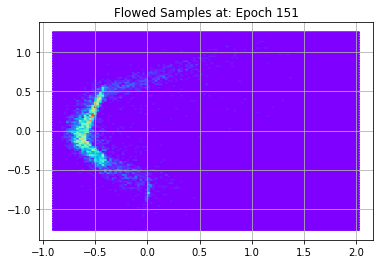

[ Epoch  151 ]:: ( Train Avg. Over Epoch ) = 1.9330241020361318, ( Generalization ) = 1.8688250125391954
[ ======== ]:: Report Learning Rate =  5.5492103925877456e-05
[ ======== ]:: Report Norm of Gradient =  324.79745907829385
[ #### ]:: In training ...  ... (epoch152=>batch0)
[ #### ]:: In training ...  ... (epoch152=>batch10)
[ #### ]:: In training ...  ... (epoch152=>batch20)
[ #### ]:: In training ...  ... (epoch152=>batch30)
[ Epoch  152 ]:: ( Train Avg. Over Epoch ) = 1.880367426927467, ( Generalization ) = 1.8605084805018104
[ ======== ]:: Report Learning Rate =  5.527609541037041e-05
[ ======== ]:: Report Norm of Gradient =  44.51289333206781
[ #### ]:: In training ...  ... (epoch153=>batch0)
[ #### ]:: In training ...  ... (epoch153=>batch10)
[ #### ]:: In training ...  ... (epoch153=>batch20)
[ #### ]:: In training ...  ... (epoch153=>batch30)
[ Epoch  153 ]:: ( Train Avg. Over Epoch ) = 1.8991013337313671, ( Generalization ) = 1.8412992178325254
[ ======== ]:: Report Learni

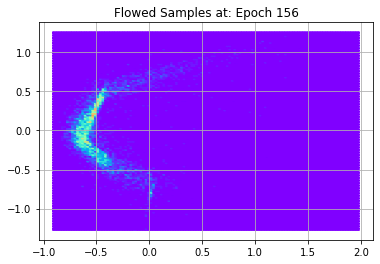

[ Epoch  156 ]:: ( Train Avg. Over Epoch ) = 1.8693803054837979, ( Generalization ) = 1.8189791016498567
[ ======== ]:: Report Learning Rate =  5.4420437027273986e-05
[ ======== ]:: Report Norm of Gradient =  142.08339557523033
[ #### ]:: In training ...  ... (epoch157=>batch0)
[ #### ]:: In training ...  ... (epoch157=>batch10)
[ #### ]:: In training ...  ... (epoch157=>batch20)
[ #### ]:: In training ...  ... (epoch157=>batch30)
[ Epoch  157 ]:: ( Train Avg. Over Epoch ) = 1.8725580836977973, ( Generalization ) = 1.8289524722996897
[ ======== ]:: Report Learning Rate =  5.420860008140494e-05
[ ======== ]:: Report Norm of Gradient =  72.46546504776073
[ #### ]:: In training ...  ... (epoch158=>batch0)
[ #### ]:: In training ...  ... (epoch158=>batch10)
[ #### ]:: In training ...  ... (epoch158=>batch20)
[ #### ]:: In training ...  ... (epoch158=>batch30)
[ Epoch  158 ]:: ( Train Avg. Over Epoch ) = 1.8432806746128199, ( Generalization ) = 1.8134923397679716
[ ======== ]:: Report Learn

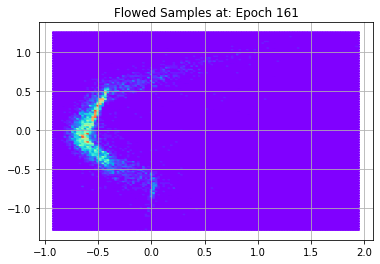

[ Epoch  161 ]:: ( Train Avg. Over Epoch ) = 1.8602097386213825, ( Generalization ) = 1.7927407675597382
[ ======== ]:: Report Learning Rate =  5.33694662252376e-05
[ ======== ]:: Report Norm of Gradient =  98.29228028029306
[ #### ]:: In training ...  ... (epoch162=>batch0)
[ #### ]:: In training ...  ... (epoch162=>batch10)
[ #### ]:: In training ...  ... (epoch162=>batch20)
[ #### ]:: In training ...  ... (epoch162=>batch30)
[ Epoch  162 ]:: ( Train Avg. Over Epoch ) = 1.8637468217123763, ( Generalization ) = 1.7749643884292343
[ ======== ]:: Report Learning Rate =  5.316172028739903e-05
[ ======== ]:: Report Norm of Gradient =  90.58788338611066
[ #### ]:: In training ...  ... (epoch163=>batch0)
[ #### ]:: In training ...  ... (epoch163=>batch10)
[ #### ]:: In training ...  ... (epoch163=>batch20)
[ #### ]:: In training ...  ... (epoch163=>batch30)
[ Epoch  163 ]:: ( Train Avg. Over Epoch ) = 1.8123673954290802, ( Generalization ) = 1.7716598944998474
[ ======== ]:: Report Learning

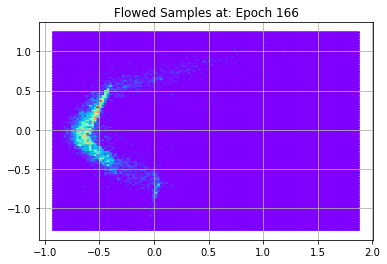

[ Epoch  166 ]:: ( Train Avg. Over Epoch ) = 1.8400630374120146, ( Generalization ) = 1.7524295542119288
[ ======== ]:: Report Learning Rate =  5.2338791835488e-05
[ ======== ]:: Report Norm of Gradient =  79.70245147441621
[ #### ]:: In training ...  ... (epoch167=>batch0)
[ #### ]:: In training ...  ... (epoch167=>batch10)
[ #### ]:: In training ...  ... (epoch167=>batch20)
[ #### ]:: In training ...  ... (epoch167=>batch30)
[ Epoch  167 ]:: ( Train Avg. Over Epoch ) = 1.8420235520982216, ( Generalization ) = 1.7427248581331114
[ ======== ]:: Report Learning Rate =  5.213505789988309e-05
[ ======== ]:: Report Norm of Gradient =  54.26466145929392
[ #### ]:: In training ...  ... (epoch168=>batch0)
[ #### ]:: In training ...  ... (epoch168=>batch10)
[ #### ]:: In training ...  ... (epoch168=>batch20)
[ #### ]:: In training ...  ... (epoch168=>batch30)
[ Epoch  168 ]:: ( Train Avg. Over Epoch ) = 1.809915801901498, ( Generalization ) = 1.7338577141463953
[ ======== ]:: Report Learning R

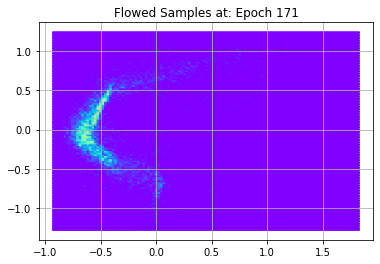

[ Epoch  171 ]:: ( Train Avg. Over Epoch ) = 1.771213742278543, ( Generalization ) = 1.7257999056211926
[ ======== ]:: Report Learning Rate =  5.132802189247206e-05
[ ======== ]:: Report Norm of Gradient =  108.14976575394786
[ #### ]:: In training ...  ... (epoch172=>batch0)
[ #### ]:: In training ...  ... (epoch172=>batch10)
[ #### ]:: In training ...  ... (epoch172=>batch20)
[ #### ]:: In training ...  ... (epoch172=>batch30)
[ Epoch  172 ]:: ( Train Avg. Over Epoch ) = 1.784268497449703, ( Generalization ) = 1.7330118243021289
[ ======== ]:: Report Learning Rate =  5.112822247906878e-05
[ ======== ]:: Report Norm of Gradient =  32.18802633137416
[ #### ]:: In training ...  ... (epoch173=>batch0)
[ #### ]:: In training ...  ... (epoch173=>batch10)
[ #### ]:: In training ...  ... (epoch173=>batch20)
[ #### ]:: In training ...  ... (epoch173=>batch30)
[ Epoch  173 ]:: ( Train Avg. Over Epoch ) = 1.7853562529769487, ( Generalization ) = 1.7229545250320712
[ ======== ]:: Report Learning

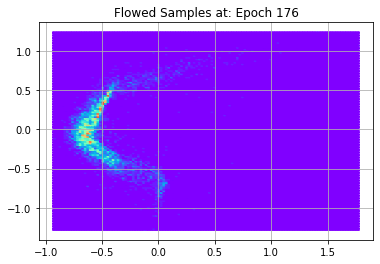

[ Epoch  176 ]:: ( Train Avg. Over Epoch ) = 1.772824151345387, ( Generalization ) = 1.7280541656399853
[ ======== ]:: Report Learning Rate =  5.033677200029944e-05
[ ======== ]:: Report Norm of Gradient =  31.264324186520447
[ #### ]:: In training ...  ... (epoch177=>batch0)
[ #### ]:: In training ...  ... (epoch177=>batch10)
[ #### ]:: In training ...  ... (epoch177=>batch20)
[ #### ]:: In training ...  ... (epoch177=>batch30)
[ Epoch  177 ]:: ( Train Avg. Over Epoch ) = 1.7663378699521566, ( Generalization ) = 1.7385271985513002
[ ======== ]:: Report Learning Rate =  5.01408311253648e-05
[ ======== ]:: Report Norm of Gradient =  30.200337094968773
[ #### ]:: In training ...  ... (epoch178=>batch0)
[ #### ]:: In training ...  ... (epoch178=>batch10)
[ #### ]:: In training ...  ... (epoch178=>batch20)
[ #### ]:: In training ...  ... (epoch178=>batch30)
[ Epoch  178 ]:: ( Train Avg. Over Epoch ) = 1.7543518957227262, ( Generalization ) = 1.731374436819084
[ ======== ]:: Report Learning

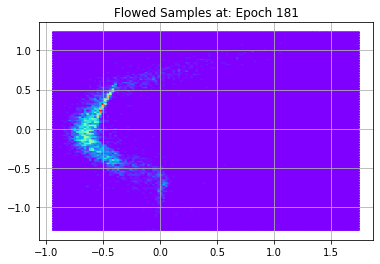

[ Epoch  181 ]:: ( Train Avg. Over Epoch ) = 1.8170433188737711, ( Generalization ) = 1.7384026433271258
[ ======== ]:: Report Learning Rate =  4.93646651865566e-05
[ ======== ]:: Report Norm of Gradient =  42.63170213533549
[ #### ]:: In training ...  ... (epoch182=>batch0)
[ #### ]:: In training ...  ... (epoch182=>batch10)
[ #### ]:: In training ...  ... (epoch182=>batch20)
[ #### ]:: In training ...  ... (epoch182=>batch30)
[ Epoch  182 ]:: ( Train Avg. Over Epoch ) = 1.790798114983669, ( Generalization ) = 1.7384218629122004
[ ======== ]:: Report Learning Rate =  4.917250833376014e-05
[ ======== ]:: Report Norm of Gradient =  76.92091073187449
[ #### ]:: In training ...  ... (epoch183=>batch0)
[ #### ]:: In training ...  ... (epoch183=>batch10)
[ #### ]:: In training ...  ... (epoch183=>batch20)
[ #### ]:: In training ...  ... (epoch183=>batch30)
[ Epoch  183 ]:: ( Train Avg. Over Epoch ) = 1.7973595865026328, ( Generalization ) = 1.737225974468748
[ ======== ]:: Report Learning R

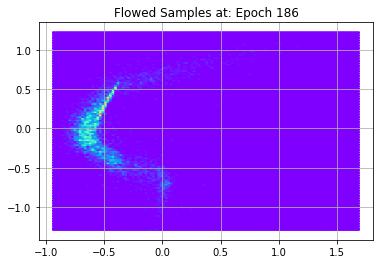

[ Epoch  186 ]:: ( Train Avg. Over Epoch ) = 1.788609534663455, ( Generalization ) = 1.7339245386174404
[ ======== ]:: Report Learning Rate =  4.841133175894426e-05
[ ======== ]:: Report Norm of Gradient =  120.94096426070375
[ #### ]:: In training ...  ... (epoch187=>batch0)
[ #### ]:: In training ...  ... (epoch187=>batch10)
[ #### ]:: In training ...  ... (epoch187=>batch20)
[ #### ]:: In training ...  ... (epoch187=>batch30)
[ Epoch  187 ]:: ( Train Avg. Over Epoch ) = 1.787737092823686, ( Generalization ) = 1.7460386404435944
[ ======== ]:: Report Learning Rate =  4.822288585101949e-05
[ ======== ]:: Report Norm of Gradient =  126.94336745307425
[ #### ]:: In training ...  ... (epoch188=>batch0)
[ #### ]:: In training ...  ... (epoch188=>batch10)
[ #### ]:: In training ...  ... (epoch188=>batch20)
[ #### ]:: In training ...  ... (epoch188=>batch30)
[ Epoch  188 ]:: ( Train Avg. Over Epoch ) = 1.7884309680216899, ( Generalization ) = 1.7565950054526915
[ ======== ]:: Report Learnin

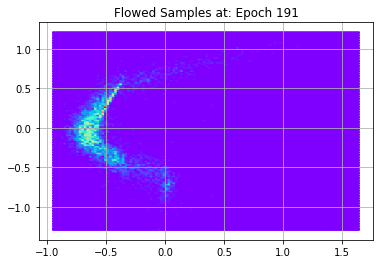

[ Epoch  191 ]:: ( Train Avg. Over Epoch ) = 1.8076516456545568, ( Generalization ) = 1.7613945649742135
[ ======== ]:: Report Learning Rate =  4.747640916468347e-05
[ ======== ]:: Report Norm of Gradient =  363.1905281373587
[ #### ]:: In training ...  ... (epoch192=>batch0)
[ #### ]:: In training ...  ... (epoch192=>batch10)
[ #### ]:: In training ...  ... (epoch192=>batch20)
[ #### ]:: In training ...  ... (epoch192=>batch30)
[ Epoch  192 ]:: ( Train Avg. Over Epoch ) = 1.8142229404530288, ( Generalization ) = 1.7688774825925846
[ ======== ]:: Report Learning Rate =  4.7291602535636455e-05
[ ======== ]:: Report Norm of Gradient =  70.27955705358482
[ #### ]:: In training ...  ... (epoch193=>batch0)
[ #### ]:: In training ...  ... (epoch193=>batch10)
[ #### ]:: In training ...  ... (epoch193=>batch20)
[ #### ]:: In training ...  ... (epoch193=>batch30)
[ Epoch  193 ]:: ( Train Avg. Over Epoch ) = 1.8228246934273455, ( Generalization ) = 1.7706104176177466
[ ======== ]:: Report Learni

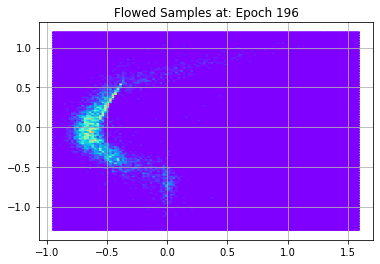

[ Epoch  196 ]:: ( Train Avg. Over Epoch ) = 1.8118544865928892, ( Generalization ) = 1.7719570064272203
[ ======== ]:: Report Learning Rate =  4.655954185263658e-05
[ ======== ]:: Report Norm of Gradient =  67.6809514698472
[ #### ]:: In training ...  ... (epoch197=>batch0)
[ #### ]:: In training ...  ... (epoch197=>batch10)
[ #### ]:: In training ...  ... (epoch197=>batch20)
[ #### ]:: In training ...  ... (epoch197=>batch30)
[ Epoch  197 ]:: ( Train Avg. Over Epoch ) = 1.8366810867883077, ( Generalization ) = 1.772253694728822
[ ======== ]:: Report Learning Rate =  4.637830422049146e-05
[ ======== ]:: Report Norm of Gradient =  27.07328659859194
[ #### ]:: In training ...  ... (epoch198=>batch0)
[ #### ]:: In training ...  ... (epoch198=>batch10)
[ #### ]:: In training ...  ... (epoch198=>batch20)
[ #### ]:: In training ...  ... (epoch198=>batch30)
[ Epoch  198 ]:: ( Train Avg. Over Epoch ) = 1.8011074967735634, ( Generalization ) = 1.7705102284674337
[ ======== ]:: Report Learning 

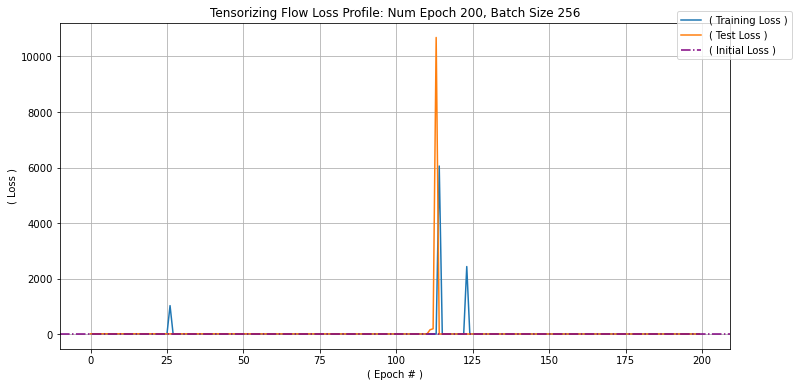

In [4]:
# the wrapper is necessary, need to load mean and std data for each mixture Gaussian first
mixture_gauss_nf_dataset = utils.datasets.TensorizingFlowDataset("mixture_gaussian2d_truncated.mat", \
                                                              gaussian_data=True)

# input mean and std to wrapper
mu_input = np.array([mixture_gauss_tf_dataset.raw_dataset['mu1'][0], \
                     mixture_gauss_tf_dataset.raw_dataset['mu2'][0], \
                     mixture_gauss_tf_dataset.raw_dataset['mu3'][0], \
                     mixture_gauss_tf_dataset.raw_dataset['mu4'][0], \
                     mixture_gauss_tf_dataset.raw_dataset['mu5'][0], \
                    mixture_gauss_tf_dataset.raw_dataset['mu6'][0], \
                     mixture_gauss_tf_dataset.raw_dataset['mu7'][0], \
                     mixture_gauss_tf_dataset.raw_dataset['mu8'][0]])
std_input = np.array([mixture_gauss_tf_dataset.raw_dataset['covmat1'], \
                      mixture_gauss_tf_dataset.raw_dataset['covmat2'], \
                      mixture_gauss_tf_dataset.raw_dataset['covmat3'], \
                      mixture_gauss_tf_dataset.raw_dataset['covmat4'], \
                      mixture_gauss_tf_dataset.raw_dataset['covmat5'], \
                      mixture_gauss_tf_dataset.raw_dataset['covmat6'], \
                      mixture_gauss_tf_dataset.raw_dataset['covmat7'], \
                      mixture_gauss_tf_dataset.raw_dataset['covmat8']])
def mixture_gaussian_logpdf_wrapper(theta, mu_list=mu_input, sig_list=std_input):
    return mixture_gaussian_logpdf(theta, mu_list, sig_list, scaling=3)


# initialize NF model
mixture_flow = NormalizingFlow(dim=mixture_gauss_nf_dataset.dim, blocks=RESNET_BLOCKS2_MIXTURE_GAUSSIAN_8MODE, \
                            flow_length=2)

# begin training
mixture_report2 = train(mixture_gauss_nf_dataset, mixture_flow, mixture_gaussian_logpdf_wrapper, 
          num_epochs=200,
          batch_size=2**8,
          verbose=True,
          lr=1e-4, 
          use_scheduler=True,
          grad_clip=1e+4)
    
    

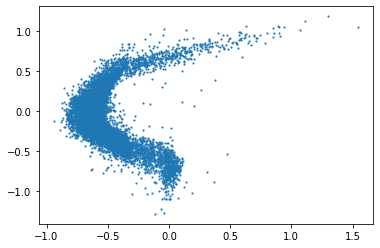

In [11]:
delete = mixture_report2['post_training_samples']
plt.scatter(delete[:,-2], delete[:,-1],s=1.2)

## Compare Final Loss

In [ ]:
mixture_report.keys()
mixture_report2.keys()

In [ ]:
plt.figure(1);
plt.plot(mixture_report['test_loss'], label='tensorizing')
plt.plot(mixture_report2['test_loss'], label='normalizing')
plt.legend()
plt.ylim([-2, 10])

## Compare Final Samples

In [ ]:
plt.figure(2, figsize=(6, 5));
plt.scatter(mixture_report['post_training_samples'][:, -2], mixture_report['post_training_samples'][:, -1], \
            label='tensor', s=1.2)
plt.scatter(mixture_report2['post_training_samples'][:, -2], mixture_report2['post_training_samples'][:, -1], \
            label='normal', s=1.2)
plt.xlim([-1, 1])
plt.ylim([-1, 1])
plt.legend()

## Compute KL Divergence Manually

In [ ]:
# input mean and std to wrapper
mu_input = np.array([mixture_gauss_tf_dataset.raw_dataset['mu1'][0], \
                     mixture_gauss_tf_dataset.raw_dataset['mu2'][0], \
                     mixture_gauss_tf_dataset.raw_dataset['mu3'][0], \
                     mixture_gauss_tf_dataset.raw_dataset['mu4'][0], \
                     mixture_gauss_tf_dataset.raw_dataset['mu5'][0], \
                    mixture_gauss_tf_dataset.raw_dataset['mu6'][0], \
                     mixture_gauss_tf_dataset.raw_dataset['mu7'][0], \
                     mixture_gauss_tf_dataset.raw_dataset['mu8'][0]])
std_input = np.array([mixture_gauss_tf_dataset.raw_dataset['covmat1'], \
                      mixture_gauss_tf_dataset.raw_dataset['covmat2'], \
                      mixture_gauss_tf_dataset.raw_dataset['covmat3'], \
                      mixture_gauss_tf_dataset.raw_dataset['covmat4'], \
                      mixture_gauss_tf_dataset.raw_dataset['covmat5'], \
                      mixture_gauss_tf_dataset.raw_dataset['covmat6'], \
                      mixture_gauss_tf_dataset.raw_dataset['covmat7'], \
                      mixture_gauss_tf_dataset.raw_dataset['covmat8']])

def mixture_gaussian_logpdf_wrapper(theta, mu_list=mu_input, sig_list=std_input):
    return mixture_gaussian_logpdf(theta, mu_list, sig_list, scaling=3)

### Code Archive

```python
full_rank_data = scipy.io.loadmat('./data/mixture_gaussian2d_full_rank.mat')['X']
full_rank_loglikes = np.log(scipy.io.loadmat('./data/mixture_gaussian2d_full_rank.mat')['likes'])

mean = np.array([0.0, 0.0]) # we know the exact mean
std = full_rank_data.std(1)
# compute KL divergence before NF training
opt_kl = loss_func_init(torch.Tensor(full_rank_data.T),\
                        torch.Tensor(full_rank_loglikes), mixture_gaussian_logpdf_wrapper)

opt_kl = opt_kl.item()
# save exact stats
mixture8 = {'mean': mean, 'std': std, 'loss': opt_kl}
scipy.io.savemat('./utils/full_rank_stats4.mat', {'mix8': mixture8})
```